Oppg1

1. Last inn data og utforsk
2. Legg rader for feature (independent variable) og target
(dependent variable) egne variabler
3. Del opp i treningsdata og testdata
4. Tren modellen
5. Predikér
6. Vurder hvor god modellen er

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
data = pd.read_csv('life-expectancy-data.csv')

In [29]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [40]:
df = pd.DataFrame(data)
new_df = df.dropna()
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [41]:
X = np.array(new_df['Alcohol']).reshape(-1, 1)
y = np.array(new_df['Life expectancy ']).reshape(-1, 1)
# X_train - er predictors som brukes for trening
# X_test er predictors som vi tester modellen vår mot
# y_train (legg merke til liten y) outcomes vi vet er “rett”
# y_test er outcomes vi sammenlikner med for å kunne si hvor god modellen er
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# reg = LinearRegression().fit(X_train, y_train)
# reg.score(X_train, y_train)

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [44]:
y_pred = lr.predict(X_test)
y_pred

array([[67.55451301],
       [71.87075708],
       [71.45797698],
       [72.84886644],
       [65.85852521],
       [65.64316168],
       [65.60726776],
       [68.37109972],
       [69.43894389],
       [66.08286222],
       [66.27130531],
       [74.06028629],
       [74.44614595],
       [76.07931938],
       [72.68734379],
       [65.29319595],
       [71.79896923],
       [65.36498379],
       [65.26627551],
       [65.12269982],
       [73.83594928],
       [70.39013281],
       [75.91779673],
       [69.44791737],
       [79.78536678],
       [65.90339261],
       [68.63133065],
       [65.12269982],
       [70.43500021],
       [68.92745551],
       [80.35966953],
       [65.31114291],
       [65.12269982],
       [71.78999575],
       [70.84778031],
       [65.16756722],
       [72.54376811],
       [66.89944894],
       [65.12269982],
       [68.46083453],
       [75.72038017],
       [66.9622633 ],
       [74.11412717],
       [65.12269982],
       [65.6341882 ],
       [67

In [50]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Evaluate the performance of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
intercept = lr.intercept_

print(r2)
print(mse)
print(mae)
print(intercept)

0.1449743848876608
64.5784504249374
6.316163833621216
[65.11372634]


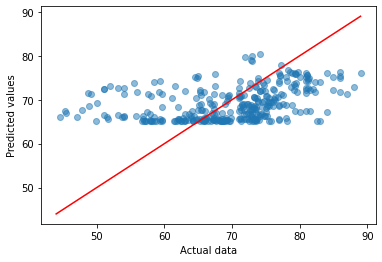

In [53]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual data")
plt.ylabel("Predicted values")
plt.show()